# Test the hologram performances with HD205905 data 05 juin 2017
==================================================================================================

- author : Sylvie
- date   : September 18th th 2017


Inspired from Jeremy's work on PN and QSO


#### problem because limitation in output of data

- firt I tried to generate a config file for jupyter

If you ran jupyter notebook --generate-config to create it, it should be in the correct place already. If not, try putting it at ~/.jupyter/jupyter_notebook_config.py

- and I set : 
> c.NotebookApp.iopub_data_rate_limit = 1000000

but it failed again so I launch jupyter as follow:

> jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000 full_baseanalysis.ipynb 

So it behaves better

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

full_baseanalysis
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/ana_05jun17/HD205905


In [5]:
from astropy.modeling import models, fitting

In [6]:
import pandas as pd

# Input directory

In [7]:
#inputdir="../OverScanRemove/trim_images"
#inputdir="../../data/CTIODataJune2017_reducedRed/data_05jun17/"
inputdir="/Volumes/LaCie2/CTIODataJune2017_reducedRed/data_05jun17/"
MIN_IMGNUMBER=46
MAX_IMGNUMBER=126
date="20170605"
object_name='HD205905'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

# Output directory

In [8]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./cut_fitsimages"
ensure_dir(outputdir)

# Location of the spectra

In [9]:
dirlist_all = [inputdir]
sorted_numbers,sorted_files = MakeFileList(dirlist_all,MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe) 

all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt=BuildImages(sorted_files,sorted_numbers,object_name)

print 'Number of images:',len(all_images)

Number of images: 80


# Find various filters

In [37]:
print all_filt

['dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Thor300', 'dia Ho

In [46]:
def get_filt_idx(listoffilt):
    filt1_idx=[]
    filt2_idx=[]
    filt3_idx=[]
    filt4_idx=[]
    filt5_idx=[]
    index=0
    for filt in listoffilt:
        if filt == 'dia Thor300':
            filt1_idx.append(index)
        elif filt == 'dia HoloPhP':
            filt2_idx.append(index)
        elif filt == 'dia HoloPhAg':
            filt3_idx.append(index)
        elif filt == 'dia HoloAmAg':
            filt4_idx.append(index)
        else :
            filt5_idx.append(index)
    
        index+=1
    
    filt1_idx=np.array(filt1_idx)
    filt2_idx=np.array(filt2_idx)
    filt3_idx=np.array(filt3_idx)
    filt4_idx=np.array(filt4_idx)
    filt5_idx=np.array(filt5_idx)
    
    return filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx
    

In [47]:
filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx=get_filt_idx(all_filt)

In [48]:
print filt1_idx
print filt2_idx
print filt3_idx
print filt4_idx
print filt5_idx

[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 55 59 63 67 71 75 79]
[ 1  5  9 13 17 21 25 29 33 37 41 45 49 56 60 64 68 72 76]
[ 2  6 10 14 18 22 26 30 34 38 42 46 50 53 57 61 65 69 73 77]
[ 3  7 11 15 19 23 27 31 35 39 43 47 51 54 58 62 66 70 74 78]
[]


# Example for one image


the idea is to check where is the center of the main star

In [10]:
sel_index=2

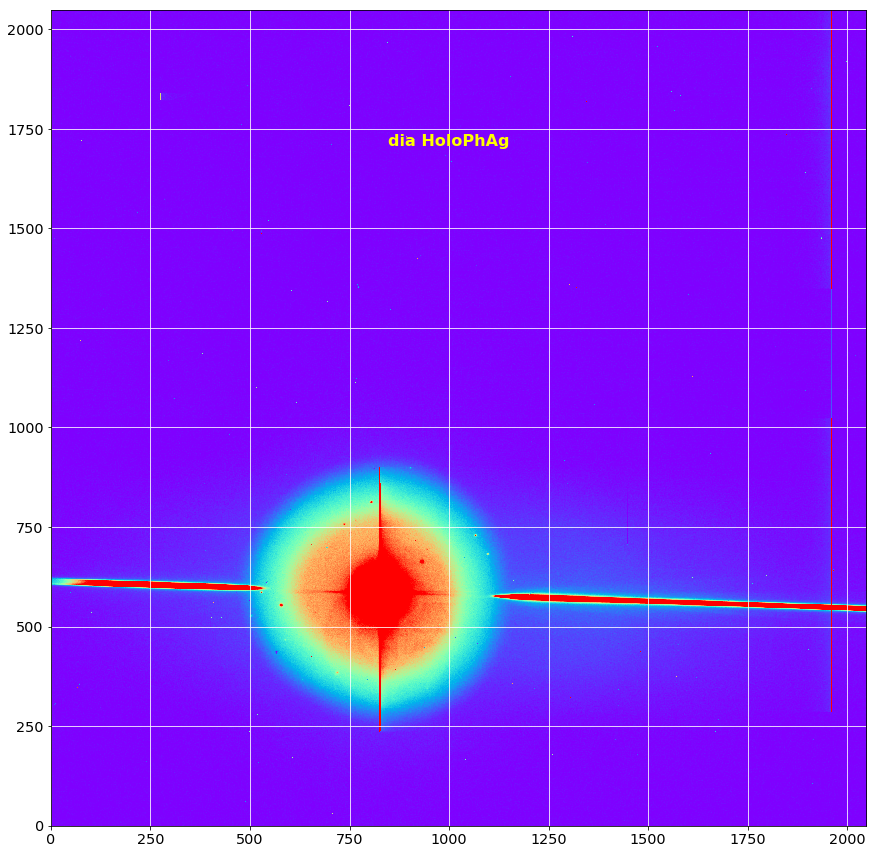

In [11]:
plt.imshow(all_images[sel_index],origin='lower',cmap='rainbow',vmin=0, vmax=800)
plt.grid(color='white', ls='solid')
plt.text(1000.,1700,all_filt[sel_index],verticalalignment='bottom', horizontalalignment='center',color='yellow', fontweight='bold',fontsize=16)

# Try to fit a 2D gaussian


In [12]:
x0=800
y0=600
dw=250

In [13]:
cropped_image=np.copy(all_images[sel_index][y0-dw:y0+dw,x0-dw:x0+dw])

In [14]:
#plt.imshow(cropped_image,origin='lower',cmap='rainbow',vmin=0, vmax=1000)
#plt.grid(color='white', ls='solid')

In [15]:
NY=cropped_image.shape[0]
NX=cropped_image.shape[1]

In [16]:
# build a mesh grid of x-y
y, x = np.mgrid[:NY,:NX]

In [17]:
z=cropped_image[y,x]

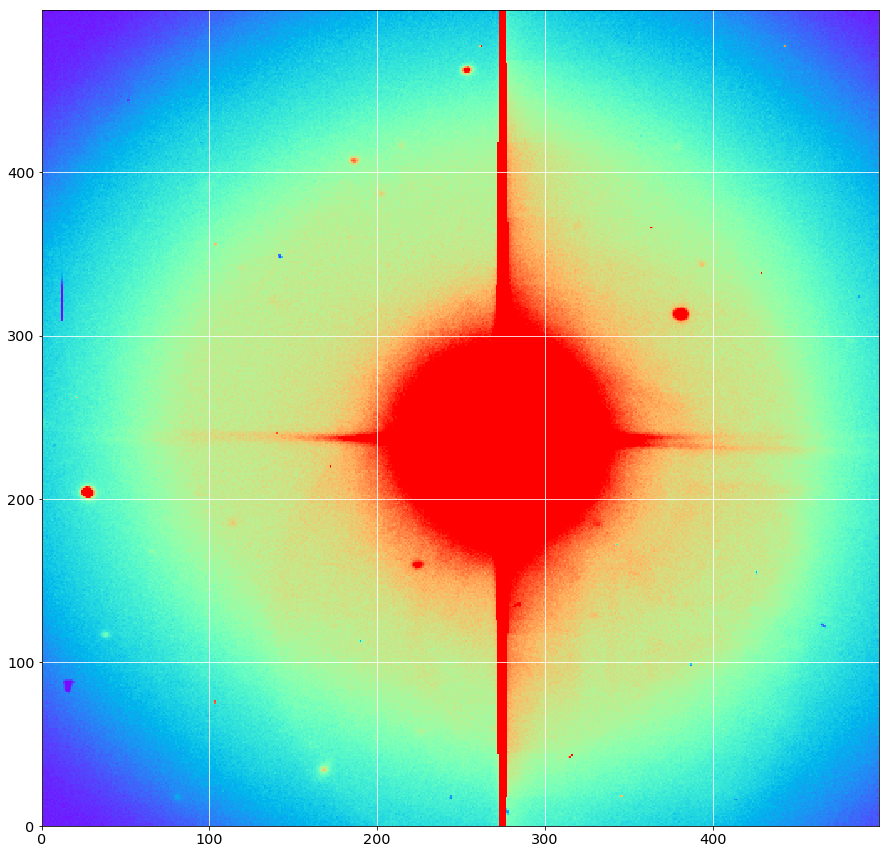

In [18]:
# plot x,y,z
plt.pcolormesh(x, y, z,cmap='rainbow',vmin=0, vmax=1000)
plt.grid(color='white', ls='solid')

In [19]:
x_mean=NX/2
y_mean=NY/2
z_max=z[y_mean,x_mean]
print x_mean,y_mean,z_max

250 250 3721.35772316


In [20]:
p_init = models.Gaussian2D(amplitude=z_max,x_mean=x_mean,y_mean=y_mean)
fit_p = fitting.LevMarLSQFitter()

In [21]:
#with warnings.catch_warnings():
#    # Ignore model linearity warning from the fitter
#    warnings.simplefilter('ignore')
#    p = fit_p(p_init, x, y, z)

In [22]:
import warnings
p = fit_p(p_init, x, y, z)

In [23]:
print p.x_mean
print p.y_mean
print p.amplitude

Parameter('x_mean', value=274.195207924)
Parameter('y_mean', value=237.300558986)
Parameter('amplitude', value=79033.8713311)


In [24]:
new_x0=p.x_mean
new_y0=p.y_mean

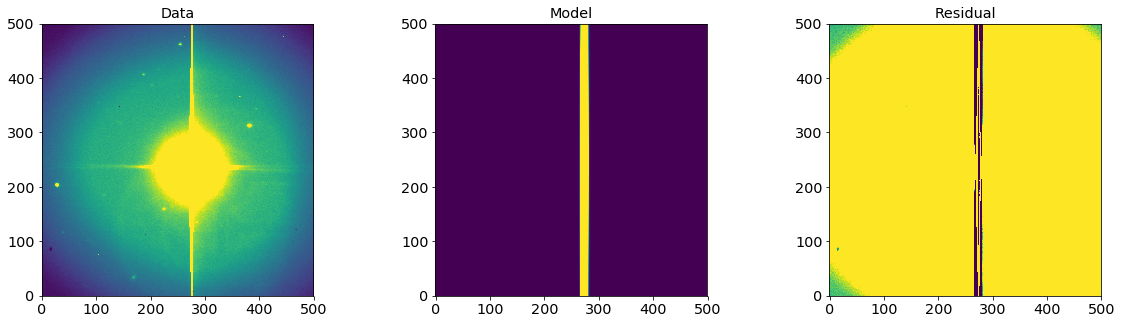

In [25]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest', vmin=0, vmax=1000)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest', vmin=0,
           vmax=1000)
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(z - p(x, y), origin='lower', interpolation='nearest', vmin=-100,
           vmax=100)
plt.title("Residual")

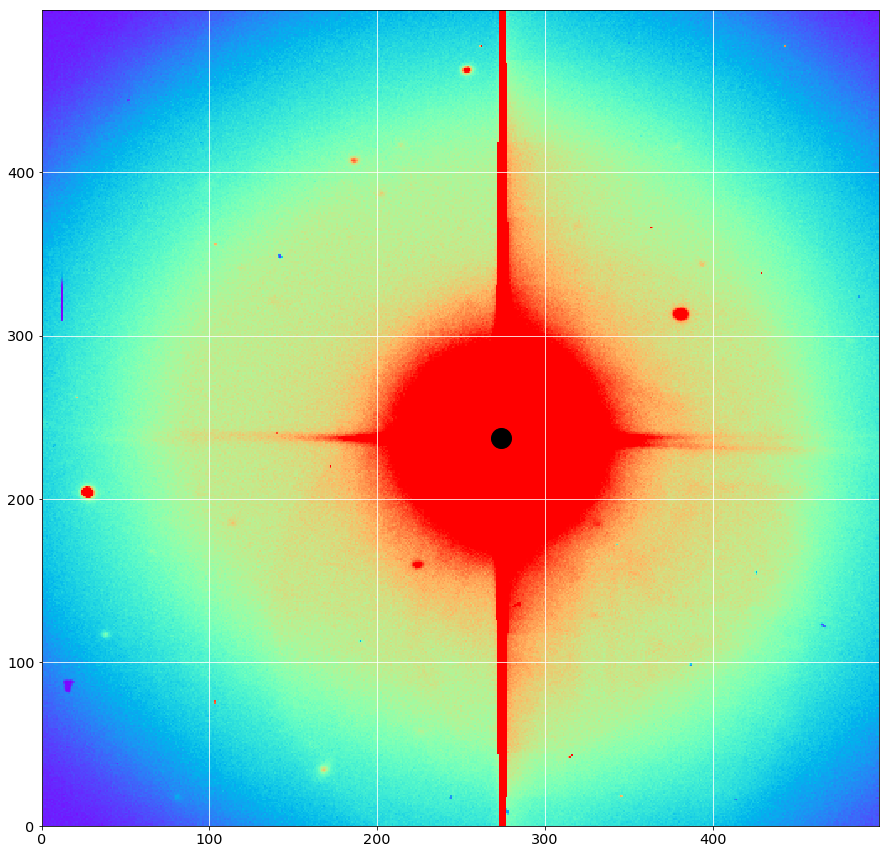

In [26]:
plt.pcolormesh(x, y, z,cmap='rainbow',vmin=0, vmax=1000)
plt.plot([new_x0],[new_y0],'ko',markersize=20)
plt.grid(color='white', ls='solid')

# Show the images

Processing image 0...
Processing image 1...
Processing image 2...
Processing image 3...
Processing image 4...
Processing image 5...
Processing image 6...
Processing image 7...
Processing image 8...
Processing image 9...
Processing image 10...
Processing image 11...
Processing image 12...
Processing image 13...
Processing image 14...
Processing image 15...
Processing image 16...
Processing image 17...
Processing image 18...
Processing image 19...
Processing image 20...
Processing image 21...
Processing image 22...
Processing image 23...
Processing image 24...
Processing image 25...
Processing image 26...
Processing image 27...
Processing image 28...
Processing image 29...
Processing image 30...
Processing image 31...
Processing image 32...
Processing image 33...
Processing image 34...
Processing image 35...
Processing image 36...
Processing image 37...
Processing image 38...
Processing image 39...
Processing image 40...
Processing image 41...
Processing image 42...
Processing image 43..

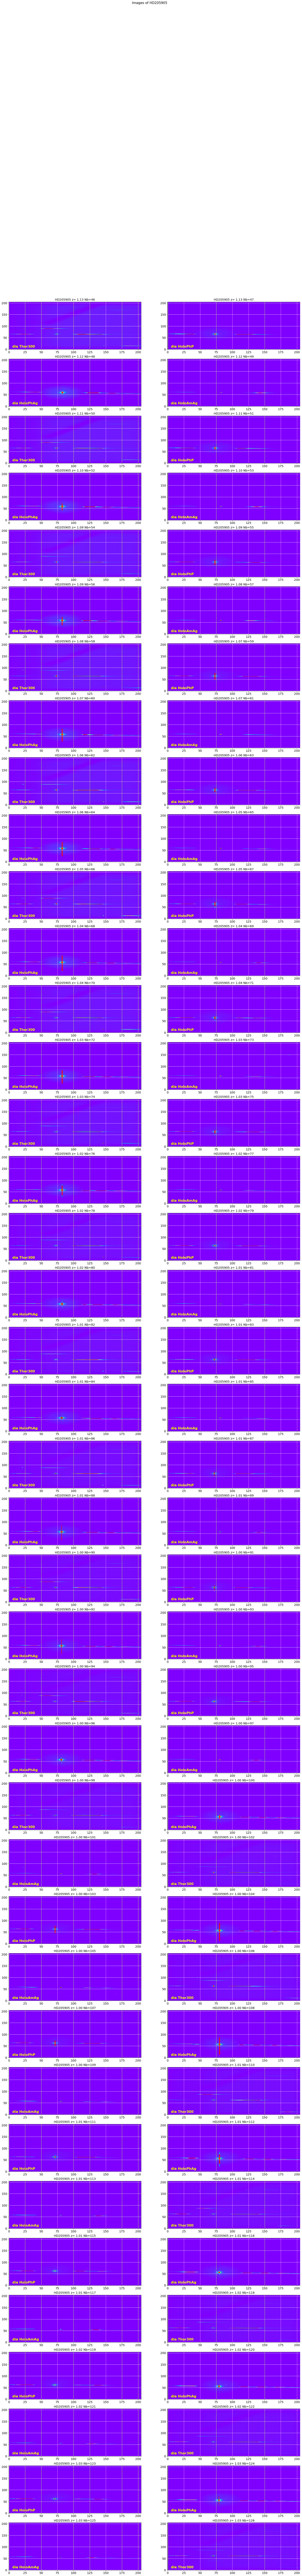

In [27]:
ShowImages(all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000,downsampling=10,verbose=True)

figfilename=os.path.join(dir_top_images,'input_images.pdf')
plt.savefig(figfilename)   

# Show the histograms

Processing image 0...
Processing image 1...
Processing image 2...
Processing image 3...
Processing image 4...
Processing image 5...
Processing image 6...
Processing image 7...
Processing image 8...
Processing image 9...
Processing image 10...
Processing image 11...
Processing image 12...
Processing image 13...
Processing image 14...
Processing image 15...
Processing image 16...
Processing image 17...
Processing image 18...
Processing image 19...
Processing image 20...
Processing image 21...
Processing image 22...
Processing image 23...
Processing image 24...
Processing image 25...
Processing image 26...
Processing image 27...
Processing image 28...
Processing image 29...
Processing image 30...
Processing image 31...
Processing image 32...
Processing image 33...
Processing image 34...
Processing image 35...
Processing image 36...
Processing image 37...
Processing image 38...
Processing image 39...
Processing image 40...
Processing image 41...
Processing image 42...
Processing image 43..

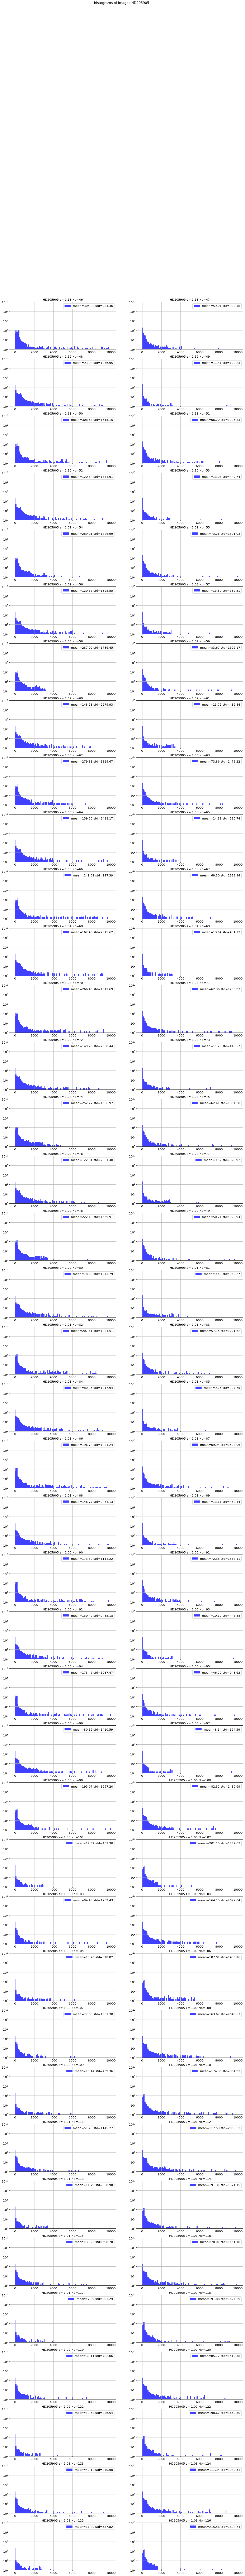

In [28]:
ShowHistograms(all_images,all_titles,all_filt,object_name,
               NBIMGPERROW=2,bins=100,range=(-50,10000),downsampling=10,verbose=True)

#  Guess central position


In [29]:
if 0:

    #x_guess = [900,900,755,755] valid only for three images
    #y_guess = [565,565,660,660]

    x_guess=[800]*len(all_images)
    y_guess=[600]*len(all_images)

    DeltaY=[100]*len(all_images)
    DeltaX=[2000]*len(all_images)  # must be very large to have correct x positions

    images_raw=ShowCenterImages(x_guess,y_guess,DeltaX,DeltaY,all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=2000,target_pos=np.array([x_guess,y_guess]).T)
    figfilename=os.path.join(dir_top_images,'cut_images.pdf')
    plt.savefig(figfilename)   

In [30]:
len(all_images)

80

In [69]:
def check_bad_guess(xy_guess,filt_idx):
    
    sigma_cut=10.
    
    the_guess=xy_guess[filt_idx]
    
    the_mean=np.median(the_guess)
    the_std=np.std(the_guess-the_mean)
    
    the_bad=np.where( np.abs(the_guess-the_mean)> 3.*sigma_cut)
    
    the_bad_idx=filt_idx[the_bad]
    
    return int(the_mean),int(the_std),the_bad_idx

In [72]:
def guess_central_position(listofimages,x0c,y0c,dwc,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx):


    x_guess = [] 
    y_guess = []
    index=0

    for theimage in listofimages:
        index+=1
        sub_image=np.copy(theimage[y0c-dwc:y0c+dwc,x0c-dwc:x0c+dwc])
    
        NY=sub_image.shape[0]
        NX=sub_image.shape[1]
        y, x = np.mgrid[:NY,:NX]
        z=sub_image[y,x]
    
        x_mean=NX/2
        y_mean=NY/2
        z_max=z[y_mean,x_mean]
    
        # do the gaussian fit
        p_init = models.Gaussian2D(amplitude=z_max,x_mean=x_mean,y_mean=y_mean)
        fit_p = fitting.LevMarLSQFitter()
    
        p = fit_p(p_init, x, y, z)
    
        x_fit= p.x_mean
        y_fit= p.y_mean
        z_fit= p.amplitude
    
        #if index%5==0 :
        print index-1,': (',x_fit,' , ',y_fit,' )'
    
        x_guess.append(x0-dw+x_fit)
        y_guess.append(y0-dw+y_fit)

    x_guess=np.array(x_guess)
    y_guess=np.array(y_guess)
    
    print 'Check fit quality :: '
    print ' ==========================='
    
    
    print 'filt 1 x : ',check_bad_guess(x_guess,filt1_idx)
    print 'filt 1 y : ',check_bad_guess(y_guess,filt1_idx)
    
    print 'filt 2 x : ',check_bad_guess(x_guess,filt2_idx)
    print 'filt 2 y : ',check_bad_guess(y_guess,filt2_idx)
    
    print 'filt 3 x : ',check_bad_guess(x_guess,filt3_idx)
    print 'filt 3 y : ',check_bad_guess(y_guess,filt3_idx)
    
    print 'filt 4 x : ',check_bad_guess(x_guess,filt4_idx)
    print 'filt 4 y : ',check_bad_guess(y_guess,filt4_idx)
    
    
    return x_guess,y_guess

In [73]:
# guess the region where the maximum is
x0c=800
y0c=600
dwc=250

x_guess,y_guess=guess_central_position(all_images,x0c,y0c,dwc,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx)

0 : ( Parameter('x_mean', value=184.263207005)  ,  Parameter('y_mean', value=297.434790864)  )
1 : ( Parameter('x_mean', value=184.02402458)  ,  Parameter('y_mean', value=292.425172636)  )
2 : ( Parameter('x_mean', value=274.195207924)  ,  Parameter('y_mean', value=237.300558986)  )
3 : ( Parameter('x_mean', value=273.627441378)  ,  Parameter('y_mean', value=235.839912558)  )
4 : ( Parameter('x_mean', value=181.749798057)  ,  Parameter('y_mean', value=295.557430488)  )
5 : ( Parameter('x_mean', value=182.665586604)  ,  Parameter('y_mean', value=290.906549053)  )
6 : ( Parameter('x_mean', value=272.720882456)  ,  Parameter('y_mean', value=222.572677079)  )
7 : ( Parameter('x_mean', value=271.857432126)  ,  Parameter('y_mean', value=233.313205593)  )
8 : ( Parameter('x_mean', value=182.137170258)  ,  Parameter('y_mean', value=293.19679304)  )
9 : ( Parameter('x_mean', value=181.460008141)  ,  Parameter('y_mean', value=283.305795754)  )
10 : ( Parameter('x_mean', value=272.331839911)  ,  

all_filt

In [ ]:
np.where(all_filt,'dia Thor300')

# Save x_guess, Y_guess

In [ ]:
ar = {'x_guess' :x_guess, 'y_guess' : y_guess}
df = pd.DataFrame(ar)

In [ ]:
df.head()

In [ ]:
df.to_csv('x_y_guess.csv')

In [ ]:
df2=pd.read_csv('x_y_guess.csv')

In [ ]:
df2.head()

# Cut image

In [ ]:
DeltaY=[100]*len(all_images)
DeltaX=[2000]*len(all_images)  # must be very large to have correct x positions

images_raw=ShowCenterImages(x_guess,y_guess,DeltaX,DeltaY,all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=2000,target_pos=np.array([x_guess,y_guess]).T)
figfilename=os.path.join(dir_top_images,'cut_images.pdf')
plt.savefig(figfilename)   

# Save cut images

In [ ]:
newfullfilenames=[]
for idx,f in np.ndenumerate(sorted_files):
    short_infilename=f.split("/")[-1]
    short_partfilename=re.findall('^%s_(.*)' % tag,short_infilename)
    short_outfilename='cutimg_'+short_partfilename[0]
    newfullfilename=os.path.join(outputdir,short_outfilename)
    newfullfilenames.append(newfullfilename)
    
for idx,f in np.ndenumerate(newfullfilenames):
    prihdu = fits.PrimaryHDU(header=all_header[idx[0]],data=images_raw[idx[0]])
    thdulist = fits.HDUList(prihdu)
    thdulist.writeto(f,overwrite=True)

!ls -l cut_fitsimages/*

# Find the optimal rotation of the spectra
============================

In [ ]:
inputdir="./cut_fitsimages"
SelectTagRe='^cutimg_%s_([0-9]+).fits$' % date # regular expression to select the file
SearchTagRe='^cutimg_%s_[0-9]+.fits$' % date

outputdir="./rotated_fitsimages"
ensure_dir(outputdir)

sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe) 

all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt=BuildImages(sorted_files,sorted_numbers,object_name)

print 'Number of images:',len(all_images)

## Find rotation by Hessian analysis

La méthode s'inspire des techniques de détection de filmanents dans le milieu interstellaire.
Elle est décrite dans https://arxiv.org/pdf/1409.6728.pdf section 4.1.
Documentation sur le calcul du Hessien : http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hessian_matrix

### Test rotation optimal settings

In [ ]:
sel=1
image_sel=np.copy(all_images[sel])
y0=DeltaY[sel]
x0=x_guess[sel]

width_cut = 100
right_edge = 1800

plt.imshow(image_sel,origin='lower',cmap='rainbow',vmin=-10,vmax=800)
plt.grid(color='white', ls='solid')
plt.show()

region=np.copy(image_sel[y0-width_cut:y0+width_cut,0:right_edge])
data=np.copy(region)
plt.imshow(data,origin='lower',cmap='rainbow',vmin=-10,vmax=800)
plt.grid(color='white', ls='solid')
plt.show()

In [ ]:
# le paramètre sigma permet de lisser le hessien
Hxx, Hxy, Hyy = hessian_matrix(data, sigma=3, order = 'xy')
lambda_plus = 0.5*( (Hxx+Hyy) + np.sqrt( (Hxx-Hyy)**2 +4*Hxy*Hxy) )
lambda_minus = 0.5*( (Hxx+Hyy) - np.sqrt( (Hxx-Hyy)**2 +4*Hxy*Hxy) )
theta = 0.5*np.arctan2(2*Hxy,Hyy-Hxx)*180/np.pi

margin_cut = 10

lambda_minus = lambda_minus[margin_cut:-margin_cut,margin_cut:-margin_cut]
lambda_plus = lambda_plus[margin_cut:-margin_cut,margin_cut:-margin_cut]
theta = theta[margin_cut:-margin_cut,margin_cut:-margin_cut]

plt.imshow(data,origin='lower',cmap='rainbow',vmin=-10,vmax=800)
plt.grid(color='white', ls='solid')
plt.show()
plt.imshow(lambda_minus,origin='lower',cmap='rainbow',vmin=-10,vmax=0)
plt.grid(color='white', ls='solid')
plt.show()

In [ ]:
lambda_threshold = -2

mask = np.where(lambda_minus>lambda_threshold)
lambda_mask = np.copy(lambda_minus)
lambda_mask[mask]=np.nan

theta_mask = np.copy(theta)
theta_mask[mask]=np.nan

print 'Number of remaining pixels :',len(lambda_mask[~np.isnan(lambda_mask)])

plt.imshow(lambda_mask,origin='lower',cmap='rainbow',vmin=-100,vmax=0)
plt.grid(color='black', ls='solid')
plt.show()

plt.imshow(theta,origin='lower',cmap=cm.brg,vmin=-30,vmax=30)
plt.grid(color='white', ls='solid')
plt.show()

plt.imshow(theta_mask,origin='lower',cmap=cm.brg,vmin=-30,vmax=30)
plt.grid(color='black', ls='solid')
plt.show()

In [ ]:
deg_threshold = 20

mask2 = np.where(np.abs(theta)>deg_threshold)
theta_mask[mask2] = np.nan
print 'Number of remaining pixels :',len(theta_mask[~np.isnan(theta_mask)])
plt.imshow(theta_mask,origin='lower',cmap=cm.brg,vmin=-deg_threshold,vmax=deg_threshold)
plt.grid(color='black', ls='solid')
plt.show()

In [ ]:
theta_hist = []
theta_hist = theta_mask[~np.isnan(theta_mask)].flatten()
theta_median = np.median(theta_hist)
print 'Angle median :',theta_median
fig = plt.figure(figsize=(10,6))
n,bins, patches = plt.hist(theta_hist,bins=int(np.sqrt(len(theta_hist))))
plt.plot([theta_median,theta_median],[0,np.max(n)])
plt.xlabel("Rotation angles [degrees]")
plt.show()

In [ ]:
xindex=np.arange(data.shape[1])
x_new = np.linspace(xindex.min(),xindex.max(), 50)
y_new = y0 - width_cut + (x_new-x0)*np.tan(theta_median*np.pi/180.)
plt.imshow(theta_mask,origin='lower',cmap='rainbow',vmin=-deg_threshold,vmax=deg_threshold)
plt.plot(x_new,y_new,'b-')
plt.grid(color='black', ls='solid')
plt.show()

In [ ]:
xtofit=[]
ytofit=[]
for iy,y in enumerate(theta_mask):
    for ix,x in enumerate(y):
        if not np.isnan(theta_mask[iy][ix]) :
            if np.abs(theta_mask[iy][ix])>deg_threshold : continue
            xtofit.append(ix)
            ytofit.append(iy)
popt, pcov = fit_line(xtofit, ytofit)
[a, b] = popt
x_new = np.linspace(xindex.min(),xindex.max(), 50)
y_new = line(x_new,a,b)
print 'Rotation angle from fit :',np.arctan(a)*180/np.pi
fig = plt.figure(figsize=[20,6])
plt.imshow(theta_mask,origin='lower',cmap=cm.brg,vmin=-deg_threshold,vmax=deg_threshold)
plt.plot(x_new,y_new,'b-')
plt.grid(color='black', ls='solid')
plt.show()
fig = plt.figure(figsize=[20,6])
diff = []
for ix,x in enumerate(xtofit):
    diff.append(ytofit[ix]-line(x,a,b))
plt.plot(xtofit,diff,'go')
plt.grid(color='black', ls='solid')
plt.show()

In [ ]:
print 'Using Hessian theta angles:'

all_theta=ComputeRotationAngleHessian(all_images,x_guess,DeltaY,all_titles,object_name, 
    NBIMGPERROW=2, lambda_threshold = -2, deg_threshold = 20, width_cut = 40, right_edge = 1800, margin_cut = 10)
figfilename=os.path.join(dir_top_images,'fit_rotation.pdf')
plt.savefig(figfilename)  

for index in range(len(all_theta)):
    print index,' theta = ',all_theta[index]
plt.figure(figsize=(10,5))
n, bins, patches=plt.hist(all_theta,bins=100,histtype='stepfilled')
plt.grid(True)
plt.title('angle of rotation (Hessian)')
plt.xlabel('angle (deg)')

# Turn the images accordingly

In [ ]:
turned_images=TurnTheImages(all_images,all_theta,all_titles,object_name,
                            NBIMGPERROW=2,vmin=500,vmax=10000,oversample_factor=1)
figfilename=os.path.join(dir_top_images,'rotated_images.pdf')
plt.savefig(figfilename)  

# Check rotations

In [ ]:
sel=1
plt.figure(figsize=(25,10))
plt.imshow(turned_images[sel],origin='lower',cmap='rainbow',vmin=0,vmax=1000)
plt.grid(True)
plt.title(all_titles[sel])
plt.grid(color='white', ls='solid')
figfilename=os.path.join(dir_top_images,'rotated_image_sample.pdf')
plt.savefig(figfilename)  

ComputeRotationAngleHessian(turned_images,x_guess,DeltaY,all_titles,object_name,
    NBIMGPERROW=2, lambda_threshold = -2, deg_threshold = 20, width_cut = 40, right_edge = 1600, margin_cut = 10)

## Must guess again the new centers for rotation

In [ ]:
# guess the region where the maximum is
x0c=750
y0c=110
dw=50

x_guess2 = [] 
y_guess2 = []
index=0

for theimage in turned_images:
    index+=1
    sub_image=np.copy(theimage[y0c-dw:y0c+dw,x0c-dw:x0c+dw])
    
    NY=cropped_image.shape[0]
    NX=cropped_image.shape[1]
    y, x = np.mgrid[:NY,:NX]
    z=sub_image[y,x]
    
    x_mean=NX/2
    y_mean=NY/2
    z_max=z[y_mean,x_mean]
    
    # do the gaussian fit
    p_init = models.Gaussian2D(amplitude=z_max,x_mean=x_mean,y_mean=y_mean)
    fit_p = fitting.LevMarLSQFitter()
    
    p = fit_p(p_init, x, y, z)
    
    x_fit= p.x_mean
    y_fit= p.y_mean
    z_fit= p.amplitude
    
    print index,': (',x_fit,' , ',y_fit,' )'
    
    x_guess2.append(x0c-dw+x_fit)
    y_guess2.append(y0c-dw+y_fit)

x_guess2=np.array(x_guess2)
y_guess2=np.array(y_guess2)

In [ ]:
DeltaY_rot2 = [20]*len(all_images)
y_guess_rot2 = [120,125,112,105]
images_cut_rot=ShowCenterImages(x_guess,y_guess_rot2,DeltaX,DeltaY_rot2,
                    turned_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=2000) 